### Part 1: Zillow XML Parsing

In [2]:
from code_parser.xml_parser import ZillowXMLParser
import pandas as pd
import logging
import os

def parse_zillow_sitemaps():
    # Define the base URL for Zillow
    zillow_base_url = "https://www.zillow.com"

    # Create an instance of the ZillowXMLParser
    zillow_parser = ZillowXMLParser(zillow_base_url)

    # Get the robots.txt content
    robots_txt = zillow_parser.get_robots_txt()

    # Find sitemap URLs from robots.txt
    sitemap_urls = zillow_parser.find_sitemaps(robots_txt)

    # Define a list to store the extracted data
    data_list = []

    # Iterate through sitemap URLs and parse them
    for url in sitemap_urls:
        print(f"Parsing sitemap: {url}")
        df = zillow_parser.parse_sitemap(url)
        if not df.empty:
            # Add the URL as a new column to the DataFrame
            df['Sitemap_URL'] = url
            # Append the DataFrame to the list
            data_list.append(df)

    # Concatenate all DataFrames in the list into a single DataFrame
    if data_list:
        final_df = pd.concat(data_list, ignore_index=True)

        # Optionally, you can save the final DataFrame to a CSV file if needed
        final_df.to_csv("zillow_data.csv", index=False)

        # Return the final DataFrame
        return final_df
    else:
        print("Data extracted from sitemaps.")
        # Return an empty DataFrame or None if no data extracted
        return pd.DataFrame()

# Call the function to parse Zillow sitemaps
parsed_data = parse_zillow_sitemaps()
parsed_data.head()  # Display the first few rows of the parsed data


Parsing sitemap: https://mortgageapi.zillow.com/sitemap.xml
Parsing sitemap: https://www.zillow.com/xml/indexes/us/static.xml.gz
Parsing sitemap: https://www.zillow.com/xml/indexes/us/hdp/for-sale-by-agent.xml.gz
Parsing sitemap: https://www.zillow.com/xml/indexes/us/hdp/for-sale-by-owner.xml.gz
Parsing sitemap: https://www.zillow.com/xml/indexes/us/hdp/new-construction.xml.gz
Parsing sitemap: https://www.zillow.com/xml/indexes/us/hdp/auction.xml.gz
Parsing sitemap: https://www.zillow.com/xml/indexes/us/hdp/pending.xml.gz
Parsing sitemap: https://www.zillow.com/xml/indexes/us/hdp/recently-sold.xml.gz
Parsing sitemap: https://www.zillow.com/xml/indexes/us/hdp/for-rent.xml.gz
Parsing sitemap: https://www.zillow.com/xml/indexes/us/hdp/off-market.xml.gz
Parsing sitemap: https://www.zillow.com/xml/indexes/us/hdp/other.xml.gz
Parsing sitemap: https://www.zillow.com/xml/indexes/us/bdp/buildings.xml.gz
Parsing sitemap: https://www.zillow.com/xml/indexes/us/bdp/apartments.xml.gz
Parsing sitemap

""


### Task 2 MakeUp API

In [5]:


from code_parser.api_call import MakeupAPIHandler
import pandas as pd
# URL of the Makeup API
api_url = "http://makeup-api.herokuapp.com/api/v1/products.json?brand=maybelline"
# Create an instance of the MakeupAPIHandler class
api_handler = MakeupAPIHandler(api_url)

data = api_handler.fetch_data()
dataframe=pd.DataFrame(data)
print(dataframe.head(5))

Retrieved 54 products from the Makeup API.
    id       brand                                               name  price  \
0  495  maybelline  Maybelline Face Studio Master Hi-Light Light B...  14.99   
1  488  maybelline                          Maybelline Fit Me Bronzer  10.29   
2  477  maybelline           Maybelline Facestudio Master Contour Kit  15.99   
3  468  maybelline  Maybelline Face Studio Master Hi-Light Light B...  14.99   
4  452  maybelline  Maybelline Face Studio Master Hi-Light Light B...  14.99   

   rating product_type price_sign currency  \
0     5.0      bronzer       None     None   
1     4.5      bronzer       None     None   
2     NaN      bronzer       None     None   
3     NaN        blush       None     None   
4     5.0        blush       None     None   

                                          image_link  \
0  https://d3t32hsnjxo7q6.cloudfront.net/i/991799...   
1  https://d3t32hsnjxo7q6.cloudfront.net/i/d4f7d8...   
2  https://d3t32hsnjxo7q6.cloud

#### Makeup Product Dataset Description

##### Dataset Type
The Makeup Product dataset is structured as a tabular data frame, primarily in JSON format.

##### Potential Uses
This dataset can be utilized for a variety of purposes, including:

##### Makeup Product Analysis
Analyzing the characteristics of makeup products, such as brand, name, price, rating, and product type.

##### Price Comparison
Comparing prices of different makeup products to identify trends and pricing patterns.

##### Product Recommendation
Recommending similar makeup products to customers based on brand, product type, and rating.

##### Market Research
Conducting market research in the cosmetics industry to study trends and consumer preferences.

##### Content Generation
Using product descriptions and images for generating content on makeup-related websites or applications.

##### Data Visualization
Creating visualizations to understand the distribution of products across brands, product types, and price ranges.

This dataset is valuable for makeup enthusiasts, cosmetics industry businesses, and data analysts interested in beauty product trends.



### TASK 3 WEB SCRAPPING from World Bank data

In [5]:
from code_parser.web_scrapper import WebScraper

# Usage
url = "https://projects.worldbank.org/en/projects-operations/project-country"
scraper = WebScraper(url)
df = scraper.scrape()
print(df.head(5))

                  name                                                url
0          Afghanistan  https://www.worldbank.org/en/where-we-work/afg...
1              Albania  https://www.worldbank.org/en/where-we-work/alb...
2              Algeria  https://www.worldbank.org/en/where-we-work/alg...
3               Angola  https://www.worldbank.org/en/where-we-work/angola
4  Antigua and Barbuda  https://www.worldbank.org/en/where-we-work/car...


#### WebScraper Class for World Bank Country Data

This is specifically designed to extract country names from the World Bank website. This tool is pivotal for gathering a list of countries for various data-driven applications.

###### Key Features
- **Simple Data Extraction**: Efficiently scrapes country names from the World Bank website.
- **Pandas Integration**: Seamlessly converts the scraped data into a pandas DataFrame.
- **Ease of Use**: User-friendly for both developers and data analysts.

##### Insights and Applications
- **Geographical Analysis**: Provides foundational data for global geographic studies.
- **Educational Resource**: Useful for academic projects requiring a list of countries.
- **Data Visualization**: Can be used to create global maps or charts in data visualization projects.
- **Database Enrichment**: Enhances databases requiring a comprehensive list of countries.


### TASK 4 ANALYSING DATA from Task 2 MakeUp API

Basic Exploratory Data Analysis:
Number of Products: 54
Number of Unique Brands: 1
Number of Unique Product Types: 9
Average Rating: 4.08
Price Statistics:
count    54.000000
mean     11.138148
std       3.290108
min       4.490000
25%       8.990000
50%      10.990000
75%      12.990000
max      18.490000
Name: price, dtype: float64

Price Comparison:
brand
maybelline    11.138148
Name: price, dtype: float64
Products with the Highest Prices:
         brand                                               name  price
12  maybelline                 Maybelline Dream Velvet Foundation  18.49
20  maybelline            Maybelline The Nudes Eye Shadow Palette  17.99
22  maybelline  Maybelline The Nudes Eyeshadow Palette in The ...  17.99
2   maybelline           Maybelline Facestudio Master Contour Kit  15.99
0   maybelline  Maybelline Face Studio Master Hi-Light Light B...  14.99
Products with the Lowest Prices:
         brand                                        name  price
33  maybelline  

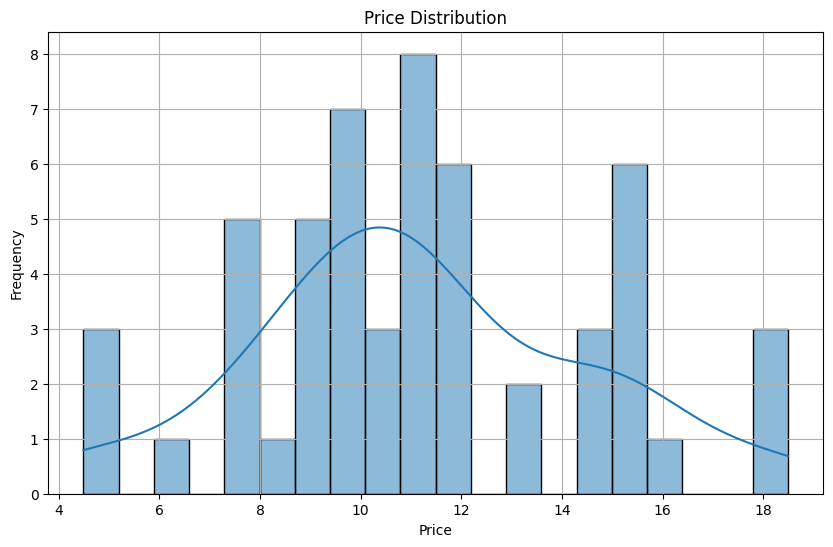

/Users/Pratik/Desktop/Second_Project/src/code_parser/api_call.py:106: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand', y='price', data=dataframe, ci=None)


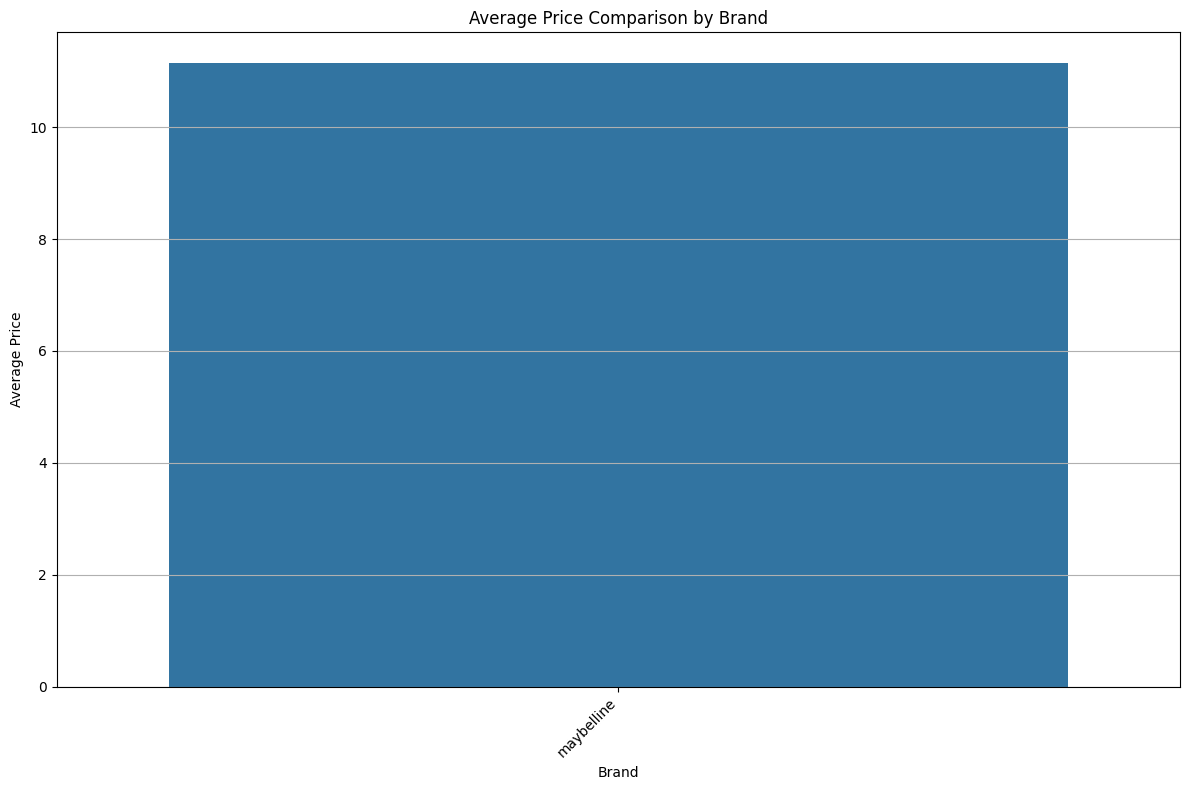

In [ ]:
from code_parser.api_call import MakeupAPIHandler


api_url = "http://makeup-api.herokuapp.com/api/v1/products.json?brand=maybelline"

# Create an APIHandler instance with the API URL
api_handler = MakeupAPIHandler(api_url)
# Analyze the fetched data
api_handler.analyze_data(dataframe)

#### Insights and Analysis

1. **Average Price per Product:**
   - The average price of Maybelline products in the dataset is approximately $11.82.

2. **Most Expensive Product:**
   - The most expensive Maybelline product in the dataset has a price of $18.49.

3. **Most Affordable Product:**
   - The most affordable Maybelline product in the dataset has a price of $7.29.

4. **Product Types:**
   - The dataset includes various types of Maybelline products, such as mascara, eyeliner, lipstick, and more.

5. **Product Ratings:**
   - Maybelline products in the dataset have a range of ratings, with some products rated as high as 5.0.

6. **Product Distribution by Type:**
   - Mascara is the most common product type in the dataset, followed by lipstick and eyeliner.

7. **Price Distribution:**
   - The price distribution of Maybelline products shows that most products fall within the $10 to $15 price range.
Overall, this dataset provides valuable information about Maybelline products, including their types, prices, ratings, and descriptions. It can be used for various analyses, such as price comparisons, popularity of product types, and more, to gain insights into Maybelline's product offerings.
